**An Analysis of Data Science Salary**
---

*Data Source*:
https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023 

---

**Model Performance Summary**

| Model              | MSE   | R-square |
|--------------------|-------|----------|
| KNN-SMOTE-XGBoost  | 0.158 | 0.668    |
| XGBoost            | 0.141 | 0.599    |

---

**Table of Content**

- [Data Importing and Wrangling](#data-importing--wrangling)
- [Exploratory Data Analysis](#exploratory-data-analysis)
    - [Summary Statistics for Numeric Variables](#summary-statistics-for-numeric-variables)
    - [Summary Statistics for Non-Numeric Variables](#summary-statistics-for-non-numeric-variables)
    - [Wordcloud for different positions](#wordcloud)
- [Modelling](#modelling)
    - [Preprocessing](#preprocessing)
    - [KNN-SMOTE-XGBoost](#knn-smote-xgboost)
    - [XGBoost](#xgboost)
- [Evaluation](#evaluation)
- [Appendix](#appendix)
---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.3f}'.format

# Data Importing & Wrangling

---

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/celesteisyy/Data_Scientists_Salary_Analysis/refs/heads/main/data/ds_salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [ ]:
job_count = df['job_title'].value_counts()
title_count_10 = job_count[job_count > 10]
title_count_10

job_title
Data Engineer                               1040
Data Scientist                               840
Data Analyst                                 612
Machine Learning Engineer                    289
Analytics Engineer                           103
Data Architect                               101
Research Scientist                            82
Data Science Manager                          58
Applied Scientist                             58
Research Engineer                             37
ML Engineer                                   34
Data Manager                                  29
Machine Learning Scientist                    26
Data Science Consultant                       24
Data Analytics Manager                        22
Computer Vision Engineer                      18
AI Scientist                                  16
BI Data Analyst                               15
Business Data Analyst                         15
Data Specialist                               14
BI Develop

In [ ]:
# Normalize spaces and case
df['job_title'] = df['job_title'].str.strip()

In [ ]:
# Replace rows containing "data analyst" with "Data Analyst"
df['job_title'] = np.where(
    df['job_title'].str.contains('data analyst', case=False, na=False),
    'Data Analyst',
    df['job_title']
)

# Replace rows containing "data engineer" with "Data Engineer"
df['job_title'] = np.where(
    df['job_title'].str.contains('data engineer', case=False, na=False),
    'Data Engineer',
    df['job_title']
)

# Replace rows containing "data scientist" with "Data Scientist"
df['job_title'] = np.where(
    df['job_title'].str.contains('data scientist', case=False, na=False),
    'Data Scientist',
    df['job_title']
)

# Replace rows containing "manager" with "Data Manager"
df['job_title'] = np.where(
    df['job_title'].str.contains('manager', case=False, na=False),
    'Data Manager',
    df['job_title']
)
# Replace rows containing 'ML Engineer' or 'Machine Learning Engineer' with 'Machine Learning Engineer'
df['job_title'] = np.where(
    df['job_title'].str.contains(r'\b(ML Engineer|Machine Learning Engineer|Machine Learning Infrastructure Engineer)\b', case=False, na=False),
    'Machine Learning Engineer',
    df['job_title']
)
# Replace rows containing 'ML Scientist' or 'Machine Learning Scientist' with 'Machine Learning Scientist'
df['job_title'] = np.where(
    df['job_title'].str.contains(r'\b(ML Scientist|Machine Learning Scientist)\b', case=False, na=False),
    'Machine Learning Scientist',
    df['job_title']
)
# <30 to "others"
job_count = df['job_title'].value_counts()
title_count_30 = job_count[job_count < 30].index
df['job_title'] = df['job_title'].replace(title_count_30, 'Others')

In [ ]:
job_count = df['job_title'].value_counts()
job_count

job_title
Data Engineer                 1067
Data Scientist                 871
Data Analyst                   662
Machine Learning Engineer      340
Others                         283
Data Manager                   113
Analytics Engineer             103
Data Architect                 101
Research Scientist              82
Applied Scientist               58
Machine Learning Scientist      38
Research Engineer               37
Name: count, dtype: int64

In [ ]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

# Exploratory Data Analysis

---

In [ ]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,Machine Learning Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,Machine Learning Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


## Summary Statistics for Numeric Variables

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,3755.000,2022.374,0.691,2020.000,2022.000,2022.000,2023.000,2023.000
salary,3755.000,190695.572,671676.501,6000.000,100000.000,138000.000,180000.000,30400000.000
salary_in_usd,3755.000,137570.390,63055.625,5132.000,95000.000,135000.000,175000.000,450000.000
remote_ratio,3755.000,46.272,48.589,0.000,0.000,0.000,100.000,100.000


## Summary Statistics for Non-Numeric Variables

In [ ]:
df.describe(include=['object', 'category']).T

,count,unique,top,freq
experience_level,3755,4,SE,2516
employment_type,3755,4,FT,3718
job_title,3755,12,Data Engineer,1067
salary_currency,3755,20,USD,3224
employee_residence,3755,78,US,3004
company_location,3755,72,US,3040
company_size,3755,3,M,3153


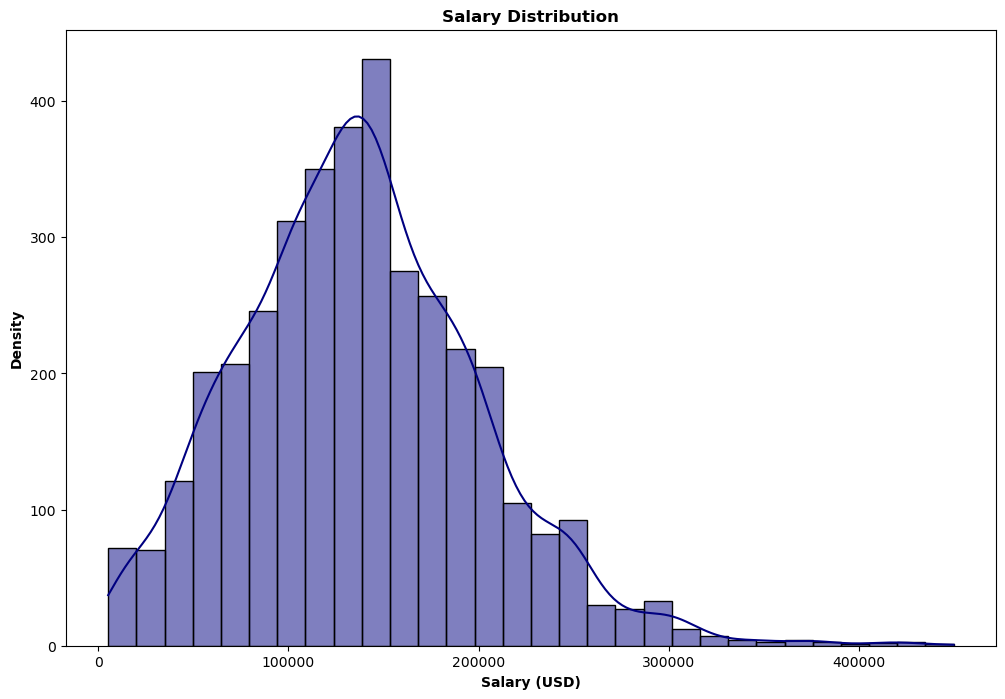

In [ ]:
plt.figure(figsize=(12, 8))
sns.histplot(df, x='salary_in_usd', bins=30, kde=True, color='navy')
plt.xlabel('Salary (USD)', fontweight='bold')
plt.ylabel('Density', fontweight='bold')
plt.title('Salary Distribution', fontweight='bold')

plt.show()

## Wordcloud

Here we use **wordcloud** to find out what might be the **most important skills** for different job roles

In [ ]:
#!pip install wordcloud
from wordcloud import WordCloud

In [ ]:
df2 = pd.read_csv('https://raw.githubusercontent.com/celesteisyy/Data_Scientists_Salary_Analysis/refs/heads/main/data/skills.csv')
df2.head()

,Role,Key Skills
0,Data Engineer,"SQL, Python, ETL, Data Warehousing, Spark, Hadoop"
1,Data Scientist,"Python, R, Machine Learning, Data Visualizatio..."
2,Data Analyst,"Excel, SQL, Tableau, Python, Data Cleaning, Bu..."
3,Machine Learning Engineer,"TensorFlow, PyTorch, Python, Machine Learning,..."
4,Others,"Varies by role (e.g., technical, managerial, h..."


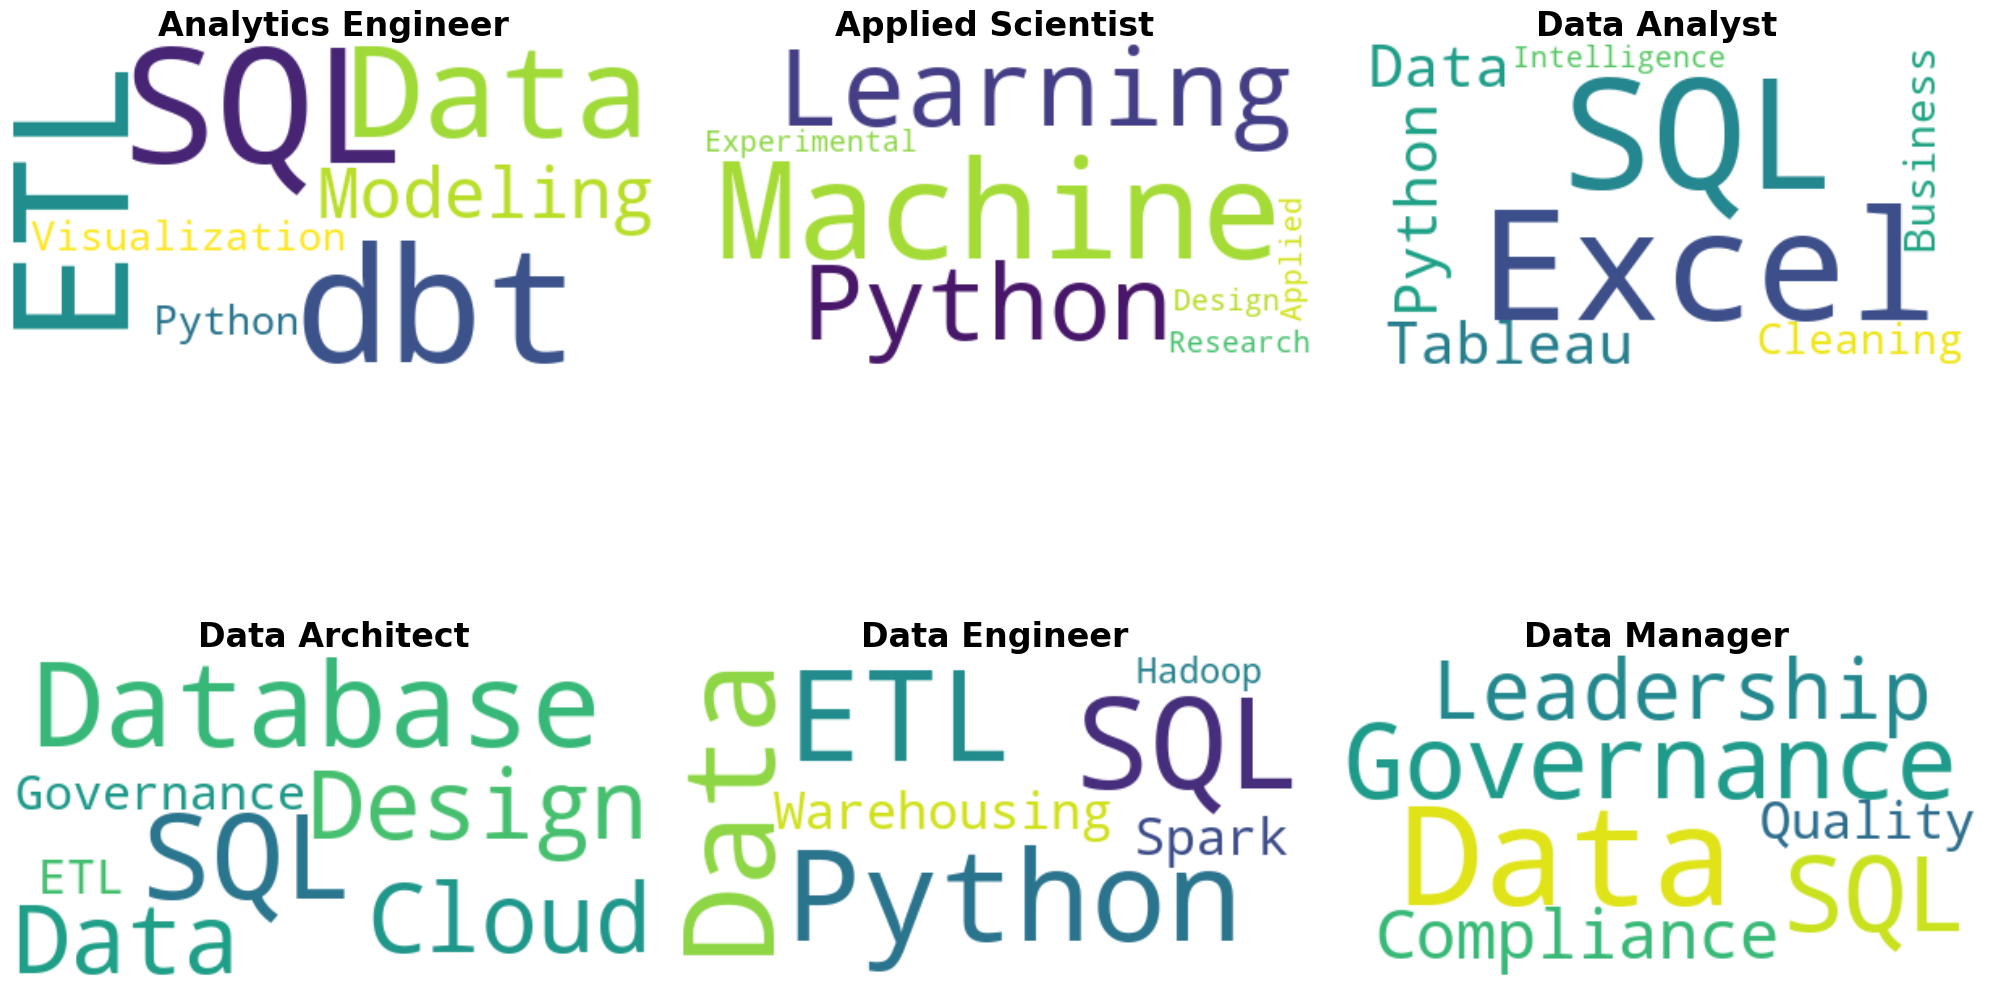

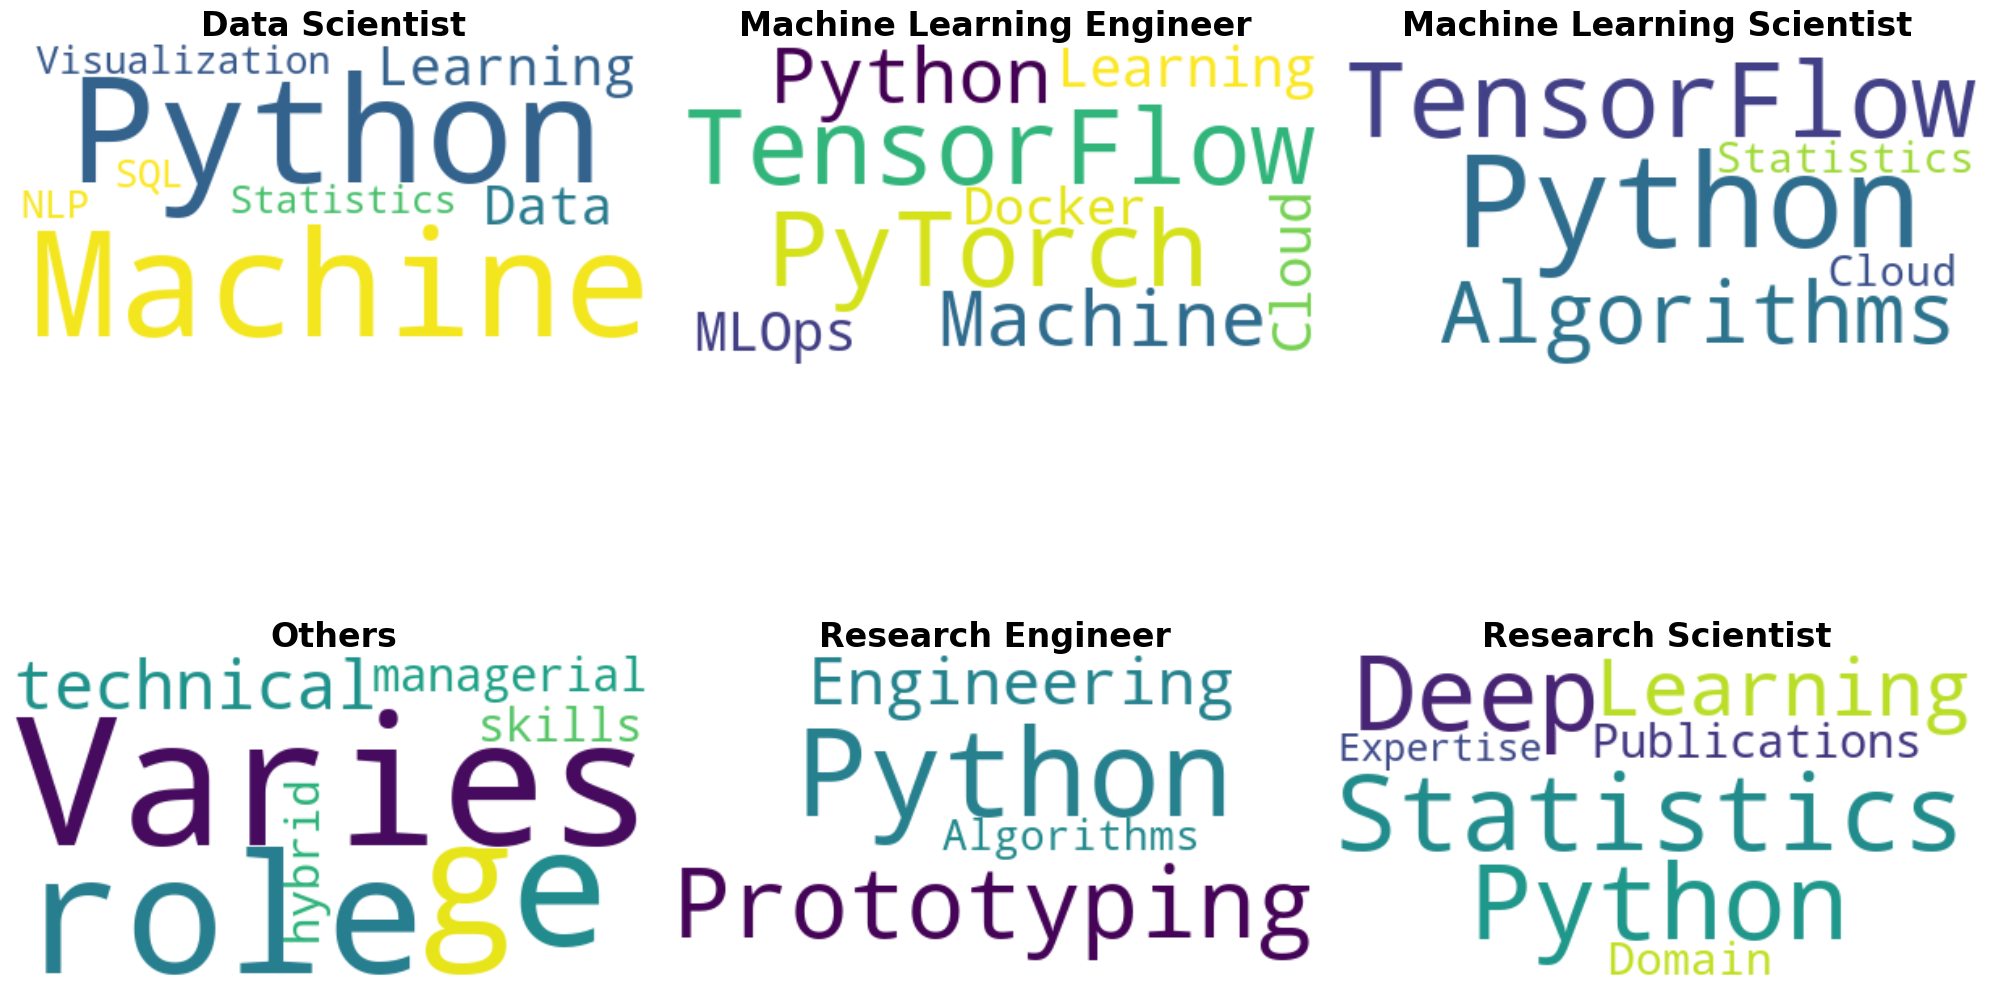

In [ ]:
role_groups = df2.groupby('Role')['Key Skills '].apply(lambda x: ' '.join(x.dropna()))

roles_per_figure = 6 
role_items = list(role_groups.items())

for i in range(0, len(role_items), roles_per_figure):
    plt.figure(figsize=(20, 15)) 

    current_roles = role_items[i:i + roles_per_figure]

    for idx, (role, skills) in enumerate(current_roles, 1):
        plt.subplot(2, 3, idx) 
        wordcloud = WordCloud(background_color='white').generate(skills)

        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(role, fontsize=24, fontweight='bold') 

    plt.tight_layout()
    plt.show()


# Modelling
---

In this part, we're analyzing and predicting the salary for data scientists.

We will conduct a predictive analysis of salary trends and their potential future trajectory. 

Since most `company_location` are concentrated in the US, with a smaller portion located in other countries, the data is clearly **imbalanced**. Therefore, we have chosen to use the **KNN-SMOTE** method to supplement the underrepresented data, aiming to make the distribution of company locations relatively more balanced.

After that, we will employ **XGBoost** to analyze and forecast salary trends.

That is, for prediction, we use the following steps and models to evaluate our predictive performance:

- [Preprocessing](#preprocessing)
    - [Predictors](#predictor-preparing)
    - [Features](#feature-preprocessing)
- [KNN-SMOTE](#knn-smote)
- [KNN-SMOTE-XGBoost](#model-initialization)
    - [Regression](#prediction---knn-smote-xgboost)
- [XGBoost](#xgboost)
    - [Regression](#prediction--xgboost-only)
- [Evaluation](#evaluation)
    - [Prediction Visualization](#visualization-for-prediction-result)
---




## Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

### Predictor Preparing

Notice in the EDA part that there're several outliers, and the distribution is skewed, which may affect our predictions:

1. For **outliers**, we set a *threshold* to exclude those data;

2. For **skewed distribution**, we use a *logarithmic transformation* to transform our target variable.

In [ ]:
outliers = df['salary_in_usd'].quantile(.99)
df = df[df['salary_in_usd'] < outliers]

In [ ]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,Machine Learning Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,Machine Learning Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [ ]:
df['salary_in_usd_log'] = np.log1p(df['salary_in_usd'])
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_in_usd_log
0,2023,SE,FT,Data Scientist,80000,EUR,85847,ES,100,ES,L,11.360
1,2023,MI,CT,Machine Learning Engineer,30000,USD,30000,US,100,US,S,10.309
2,2023,MI,CT,Machine Learning Engineer,25500,USD,25500,US,100,US,S,10.146
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M,12.073
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M,11.695


#### Additional Features

In this part, we add an additional feature called `new_work_own_country` to check if employees are working in the same country as their nationality. In this way, we expect introducing new feature can improve our predictive performance


In addition, `company_location` is dropped because we already set it to the US

In [ ]:
df['work_own_country'] = df['employee_residence'] == df['company_location']
df['work_own_country'] = df['work_own_country'].map({True: 'Yes', False: 'No'})

In [ ]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_in_usd_log,work_own_country
0,2023,SE,FT,Data Scientist,80000,EUR,85847,ES,100,ES,L,11.360,Yes
1,2023,MI,CT,Machine Learning Engineer,30000,USD,30000,US,100,US,S,10.309,Yes
2,2023,MI,CT,Machine Learning Engineer,25500,USD,25500,US,100,US,S,10.146,Yes
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M,12.073,Yes
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M,11.695,Yes


### Feature Preprocessing

First, we need to select features for predicing. That is, we need to exclude `salary` and `salary_currency` since we're only interested in salaries in USD. We also need to exclude `salary_in_usd` because this is the target variable we're predicting.

In [ ]:
df_feature = df.drop(columns=['salary', 'salary_currency', 'salary_in_usd'])
df_feature

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size,salary_in_usd_log,work_own_country
0,2023,SE,FT,Data Scientist,ES,100,ES,L,11.360,Yes
1,2023,MI,CT,Machine Learning Engineer,US,100,US,S,10.309,Yes
2,2023,MI,CT,Machine Learning Engineer,US,100,US,S,10.146,Yes
3,2023,SE,FT,Data Scientist,CA,100,CA,M,12.073,Yes
4,2023,SE,FT,Data Scientist,CA,100,CA,M,11.695,Yes
...,...,...,...,...,...,...,...,...,...,...
3749,2021,SE,FT,Others,US,100,US,L,12.014,Yes
3751,2021,MI,FT,Data Scientist,US,100,US,L,11.925,Yes
3752,2020,EN,FT,Data Scientist,US,100,US,S,11.562,Yes
3753,2020,EN,CT,Data Analyst,US,100,US,L,11.513,Yes


#### Encoding

Columns like `experience_level`, `employment_type`, `job_title`, `employee_residence`,  and `company_size` are categorical and therefore need to be encoded into numerical values for feature selection:

In [ ]:
selected_columns = df_feature.columns
encoder = LabelEncoder()

for col in selected_columns:
    df_feature[col + '_encoded'] = encoder.fit_transform(df_feature[col])

df_feature.head()

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size,salary_in_usd_log,work_own_country,work_year_encoded,experience_level_encoded,employment_type_encoded,job_title_encoded,employee_residence_encoded,remote_ratio_encoded,company_location_encoded,company_size_encoded,salary_in_usd_log_encoded,work_own_country_encoded
0,2023,SE,FT,Data Scientist,ES,100,ES,L,11.360,Yes,3,3,2,6,26,2,25,0,342,1
1,2023,MI,CT,Machine Learning Engineer,US,100,US,S,10.309,Yes,3,2,0,7,74,2,70,2,89,1
2,2023,MI,CT,Machine Learning Engineer,US,100,US,S,10.146,Yes,3,2,0,7,74,2,70,2,75,1
3,2023,SE,FT,Data Scientist,CA,100,CA,M,12.073,Yes,3,3,2,6,11,2,12,1,757,1
4,2023,SE,FT,Data Scientist,CA,100,CA,M,11.695,Yes,3,3,2,6,11,2,12,1,509,1


Here, `encoded_col` has the `y` we need to predict while `encoded_features` only has features for predicting.

In [ ]:
encoded_col = [
    'work_year_encoded',
    'experience_level_encoded', 
    'employment_type_encoded', 
    'job_title_encoded',
    'employee_residence_encoded',
    'remote_ratio',
    'company_size_encoded',
    'company_location_encoded',
    'work_own_country_encoded',
    'salary_in_usd_log'
]

encoded_features =  [
    'work_year_encoded',
    'experience_level_encoded', 
    'employment_type_encoded', 
    'job_title_encoded',
    'employee_residence_encoded',
    'remote_ratio_encoded',
    'company_size_encoded',
    'company_location_encoded',
    'work_own_country_encoded'
]

In [ ]:
df_encoded_ks = df_feature[encoded_col]

Although tree mothods are *scale-invariant*, if scale differences cause certain features to be overly prioritized, it still may bring problems.

Also, we care about the **interpretability of feature importance**, a feature standardization process is needed. Here we use MinMax method for scaling:

In [ ]:
scaler = MinMaxScaler()
X_scaled_ks = scaler.fit_transform(df_encoded_ks)

## KNN-SMOTE 

In [ ]:
#!pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import KBinsDiscretizer

In [ ]:
non_us_mask = df_feature['company_location'] != 'US'
X_non_us = X_scaled_ks[non_us_mask]
y_non_us = df.loc[non_us_mask, 'salary_in_usd_log']

In [ ]:
binner = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
y_binned = binner.fit_transform(y_non_us.values.reshape(-1, 1)).ravel()

In [ ]:
smote = SMOTE(k_neighbors=5, random_state=557)
X_resampled, y_resampled_binned = smote.fit_resample(X_non_us, y_binned)
y_resampled = binner.inverse_transform(y_resampled_binned.reshape(-1, 1)).ravel()

resampled_data = pd.DataFrame(X_resampled, columns=df_encoded_ks.columns)
resampled_data['salary_in_usd_log'] = y_resampled

label_encoders = {}
for col, le in label_encoders.items():
    if col in resampled_data.columns:
        resampled_data[col] = le.inverse_transform(resampled_data[col])

df_final = pd.concat([df_encoded_ks, resampled_data])

In [ ]:
print(f"Original data shape: {df_feature[encoded_col].shape}")
print(f"Resampled data shape: {resampled_data.shape}")
print(f"Final data shape: {df_final.shape}")

Original data shape: (3716, 10)
Resampled data shape: (740, 10)
Final data shape: (4456, 10)


In [ ]:
df_final.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year_encoded,4456.000,2.089,0.903,0.000,2.000,2.000,3.000,3.000
experience_level_encoded,4456.000,2.169,1.080,0.000,1.000,3.000,3.000,3.000
employment_type_encoded,4456.000,1.776,0.510,0.000,2.000,2.000,2.000,3.000
job_title_encoded,4456.000,4.127,2.726,0.000,2.000,4.000,6.000,11.000
employee_residence_encoded,4456.000,54.458,29.702,0.000,29.000,74.000,74.000,76.000
remote_ratio,4456.000,38.635,47.512,0.000,0.000,0.500,100.000,100.000
company_size_encoded,4456.000,0.839,0.420,0.000,1.000,1.000,1.000,2.000
company_location_encoded,4456.000,51.816,27.991,0.000,28.000,70.000,70.000,71.000
work_own_country_encoded,4456.000,0.966,0.181,0.000,1.000,1.000,1.000,1.000
salary_in_usd_log,4456.000,11.567,0.678,8.543,11.280,11.719,12.038,12.625


## KNN-SMOTE-XGBoost

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
df_final_feature = df_final.drop(columns= 'salary_in_usd_log')

In [ ]:
X_scaled = scaler.fit_transform(df_final_feature)

In [ ]:
X = X_scaled
y = df_final['salary_in_usd_log']   

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=557)

Here we use **grid search** to find the best hyperparameters （takes about 25s)

In [ ]:
param_grid = {
    'n_estimators': [50, 200, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [4, 6, 8]
}

grid_search = GridSearchCV(estimator=XGBRegressor(random_state=557),
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=5, verbose=1)

grid_search.fit(X_train, y_train)


print(f"Best Parameters: {grid_search.best_params_}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200}


In [ ]:
model = XGBRegressor(
    n_estimators=200,  # number of trees
    learning_rate=0.1,
    max_depth=4,       # depth of trees
    random_state=557
)

In [ ]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=557, ...)

### Prediction - KNN-SMOTE-XGBoost

In [ ]:
y_pred = model.predict(X_test)

Since we conduced a log transformation before training our model, here we need to reverse them back to check the actual scale:

In [ ]:
y_pred_ori = np.expm1(y_pred)
y_test_ori = np.expm1(y_test)

In [ ]:
features = pd.DataFrame(X, columns=['work_year', 'experience_level', 'employment_type', 'job_title', 'employee_residence',
                             'remote_ratio', 'company_size','work_own_country','company_location'])

feature_importances = model.feature_importances_

feature_names = features.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

importance = importance_df.sort_values(by='Importance', ascending=False)
print(importance.to_string(index=False))

           Feature  Importance
employee_residence       0.402
  experience_level       0.234
  work_own_country       0.083
         job_title       0.063
   employment_type       0.059
      company_size       0.042
  company_location       0.042
      remote_ratio       0.039
         work_year       0.036


To check the visualization part, see 
- [Appendix](#appendix)

## XGBoost

In this part, we use XGBoost model only to compare the prediction performance with the model which deal with imbalanced data

In [ ]:
X_scaled_one = scaler.fit_transform(df_feature[encoded_features])

In [ ]:
X_one = X_scaled_one
y_one = df['salary_in_usd_log']   

X_train_one, X_test_one, y_train_one, y_test_one = train_test_split(X_one, y_one, test_size=0.2, random_state=557)

Here we use **grid search** to find the best hyperparameters （takes about 30s)

In [ ]:
param_grid_one = {
    'n_estimators': [50, 200, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [4, 6, 8]
}

grid_search_one = GridSearchCV(estimator=XGBRegressor(random_state=557),
                           param_grid=param_grid_one,
                           scoring='neg_mean_squared_error',
                           cv=5, verbose=1)

grid_search_one.fit(X_train_one, y_train_one)


print(f"Best Parameters: {grid_search_one.best_params_}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200}


In [ ]:
model_one = XGBRegressor(
    n_estimators=200,  # number of trees
    learning_rate=0.1,
    max_depth=4,       # depth of trees
    random_state=557
)

In [ ]:
model_one.fit(X_train_one, y_train_one)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=557, ...)

### Prediction -XGBoost Only

In [ ]:
y_pred_one = model_one.predict(X_test_one)

Since we conduced a log transformation before training our model, here we need to reverse them back to check the actual scale:

In [ ]:
y_pred_ori_one = np.expm1(y_pred_one)
y_test_ori_one = np.expm1(y_test_one)

In [ ]:
features = pd.DataFrame(X, columns=['work_year', 'experience_level', 'employment_type', 'job_title', 'employee_residence',
                             'remote_ratio', 'company_size','work_own_country','company_location'])

feature_importances_one = model_one.feature_importances_

feature_names = features.columns
importance_df_one = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances_one
})

importance_one = importance_df_one.sort_values(by='Importance', ascending=False)
print(importance_one.to_string(index=False))

           Feature  Importance
employee_residence       0.403
  experience_level       0.271
  work_own_country       0.076
         job_title       0.073
      company_size       0.041
      remote_ratio       0.040
   employment_type       0.037
  company_location       0.031
         work_year       0.028


To check the visualization part, see 
- [Appendix](#appendix)

# Evaluation
---

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
mse_one = mean_squared_error(y_test_one, y_pred_one)
r2_one = r2_score(y_test_one, y_pred_one)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
evaluation = pd.DataFrame({
    'model':['KNN-SMOTE-XGBoost','XGBoost'],
    'MSE': [mse,mse_one],
    'R-square':[r2,r2_one]
})

In [ ]:
evaluation.set_index('model', inplace=True)
evaluation

,MSE,R-square
model,,
KNN-SMOTE-XGBoost,0.158,0.668
XGBoost,0.141,0.599


## Visualization for Prediction Result

In [ ]:
import matplotlib.pyplot as plt

### KNN-SMOTE-XGBoost

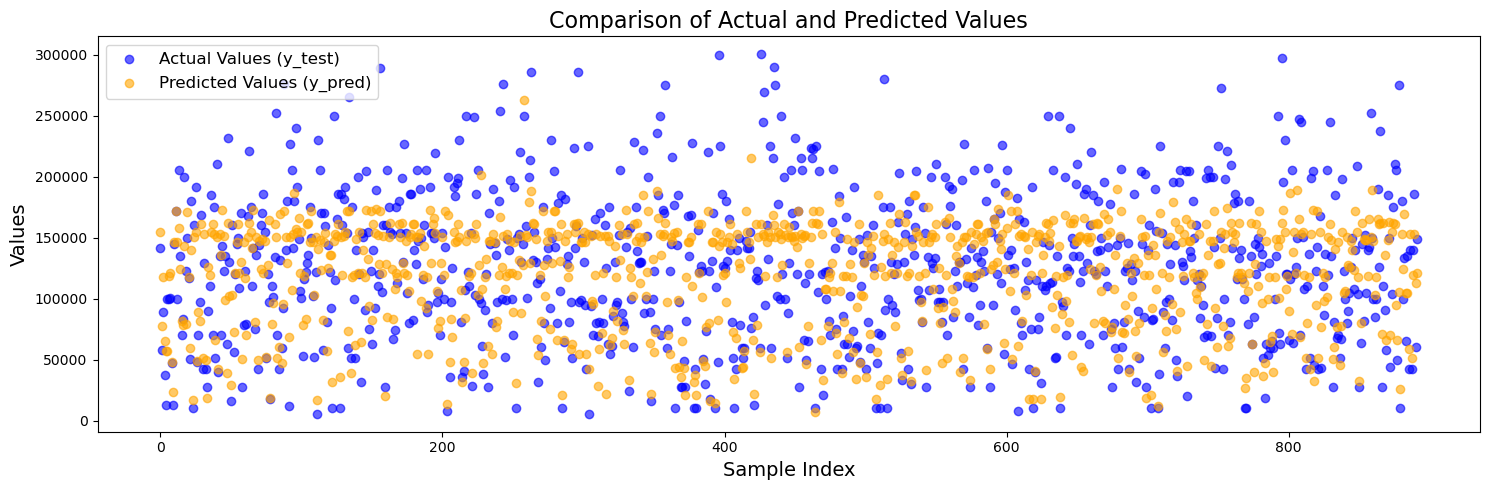

In [ ]:
plt.figure(figsize=(15, 5))
plt.scatter(range(len(y_test_ori)), y_test_ori, color='blue', alpha=0.6, label='Actual Values (y_test)')
plt.scatter(range(len(y_pred_ori)), y_pred_ori, color='orange', alpha=0.6, label='Predicted Values (y_pred)')

plt.title('Comparison of Actual and Predicted Values', fontsize=16)
plt.xlabel('Sample Index', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

### XGBoost

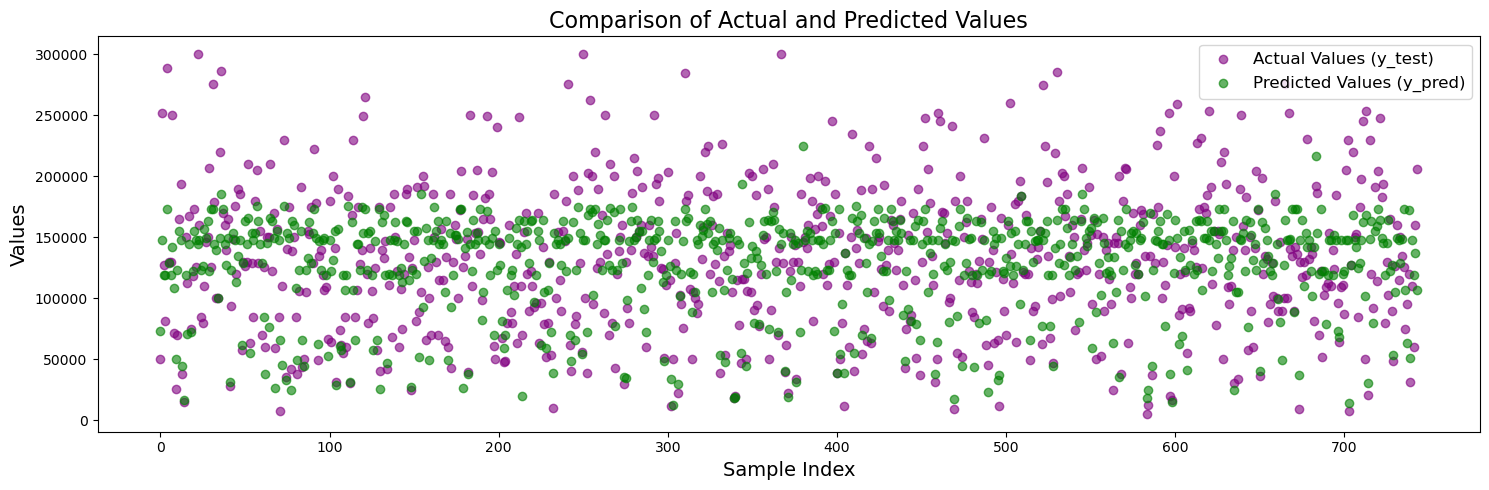

In [ ]:
plt.figure(figsize=(15, 5))
plt.scatter(range(len(y_test_ori_one)), y_test_ori_one, color='purple', alpha=0.6, label='Actual Values (y_test)')
plt.scatter(range(len(y_pred_ori_one)), y_pred_ori_one, color='green', alpha=0.6, label='Predicted Values (y_pred)')

plt.title('Comparison of Actual and Predicted Values', fontsize=16)
plt.xlabel('Sample Index', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

# Appendix
---

## 1. Feature Importance Visualization

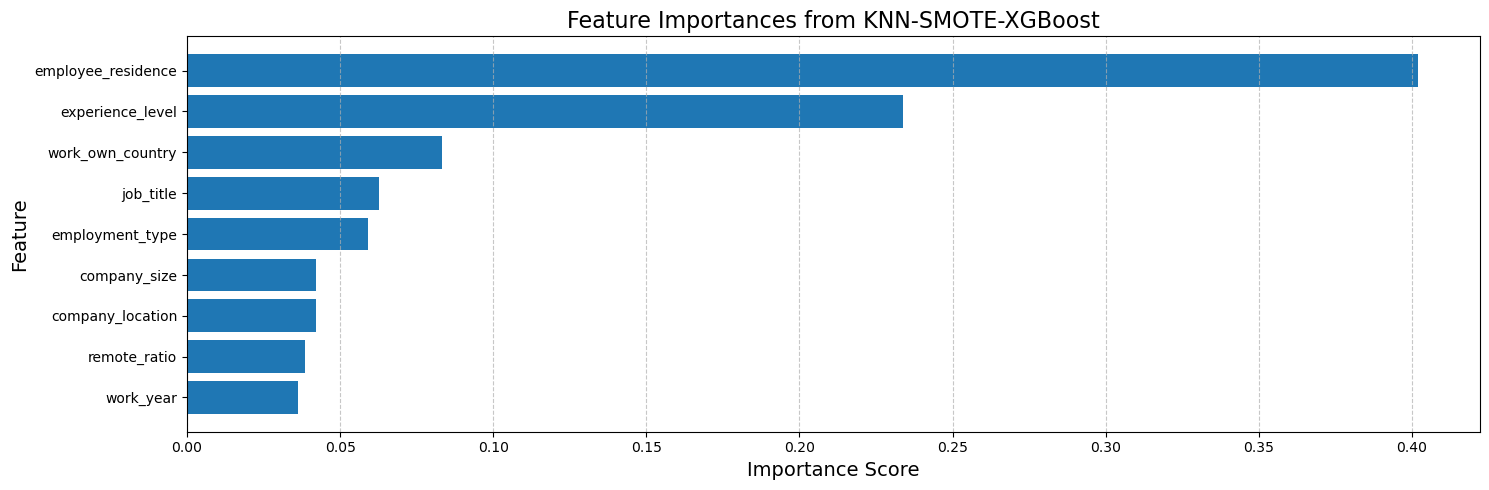

In [ ]:
plt.figure(figsize=(15, 5))
plt.barh(importance['Feature'], importance['Importance']) 
plt.gca().invert_yaxis()
plt.title('Feature Importances from KNN-SMOTE-XGBoost', fontsize=16)
plt.xlabel('Importance Score', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

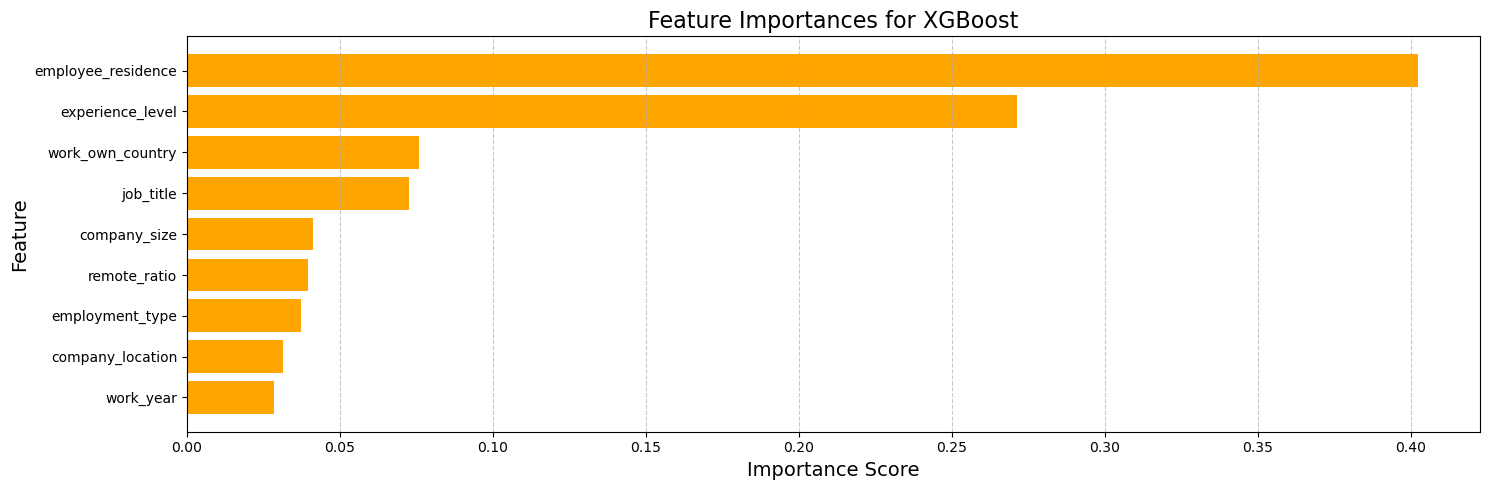

In [ ]:
plt.figure(figsize=(15, 5))
plt.barh(importance_one['Feature'], importance_one['Importance'],color = 'orange') 
plt.gca().invert_yaxis()
plt.title('Feature Importances for XGBoost', fontsize=16)
plt.xlabel('Importance Score', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Common **Most** Important Variabale(s):

`employee_residence`, `experience_level`,`work_on_country`

Common **Least** Important Varaible(s):

`work_year`

## 2. Salary Distributions before/after KNN-SMOTE

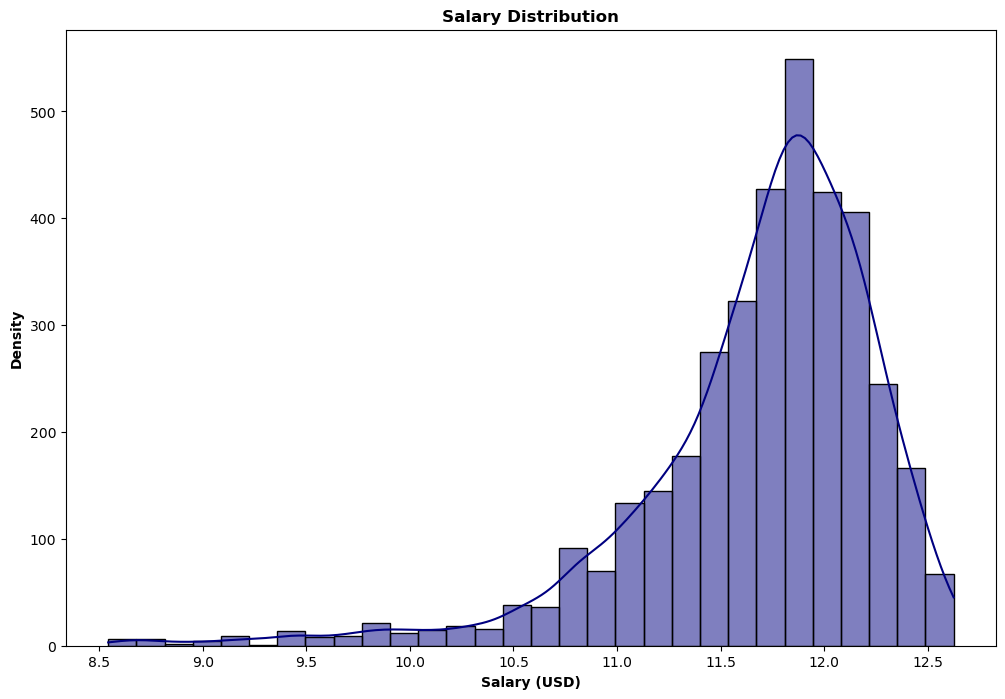

In [ ]:
plt.figure(figsize=(12, 8))
sns.histplot(df, x='salary_in_usd_log', bins=30, kde=True, color='navy')
plt.xlabel('Salary (USD)', fontweight='bold')
plt.ylabel('Density', fontweight='bold')
plt.title('Salary Distribution', fontweight='bold')

plt.show()

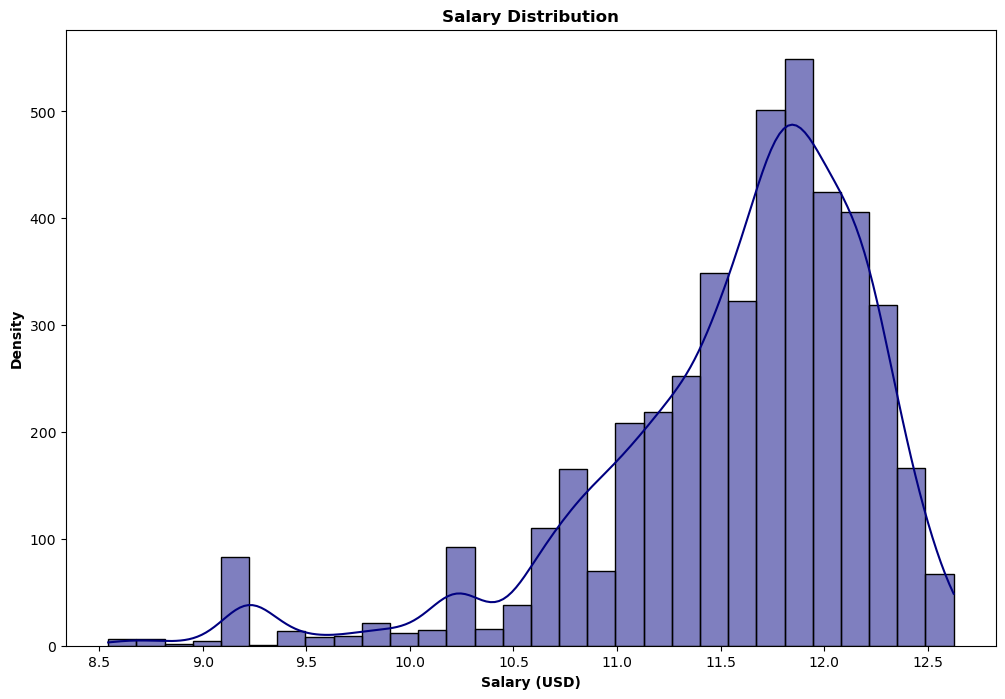

In [ ]:
plt.figure(figsize=(12, 8))
sns.histplot(df_final, x='salary_in_usd_log', bins=30, kde=True, color='navy')
plt.xlabel('Salary (USD)', fontweight='bold')
plt.ylabel('Density', fontweight='bold')
plt.title('Salary Distribution', fontweight='bold')

plt.show()

From the two figures, it can be observed that KNN-SMOTE does not significantly disrupt the original distribution overall; however, values in the left tail are accentuated, which might explain why the `MSE` of **KNN-SMOTE** is slightly higher in the end.


--**End of the Notebook**--

<div style="text-align: right;font-family: 'Comic Sans MS';">
    Author: Celeste

    2024.12
</div>
